In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
df=pd.read_csv("financial_regression.csv")
df.dropna(inplace=True)
df


,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
55,2010-04-01,117.80,118.2500,117.10,117.80,161083608.0,1.1500,48.34,48.7000,47.7900,...,49.3200,48.7730,48.9200,135299.0,0.5470,109.9700,110.4700,109.9200,110.260,11370417.0
121,2010-07-01,103.15,103.4900,101.13,102.76,382651225.0,2.3600,42.82,42.9600,41.7700,...,43.4210,42.2500,43.0760,508265.0,1.1710,120.9100,121.0300,116.9800,117.040,33228085.0
188,2010-10-01,114.99,115.1200,113.93,114.61,174556419.0,1.1900,49.46,49.5300,48.7810,...,57.7000,56.8300,57.1300,190301.0,0.8700,128.7200,129.0700,127.9100,128.910,17209253.0
319,2011-04-01,133.41,133.7700,132.83,133.15,153904534.0,0.9400,57.72,57.9000,57.2900,...,77.1000,75.6400,76.7600,82214.0,1.4600,138.6500,139.5500,137.7200,139.200,15738269.0
385,2011-07-01,132.09,134.1000,131.78,133.92,201950626.0,2.3200,57.10,57.9850,56.9200,...,75.2500,74.1900,75.1000,52275.0,1.0600,144.7600,145.0700,143.9700,144.930,16364459.0
716,2012-10-01,144.52,145.6900,144.01,144.35,135858200.0,1.6800,68.90,69.3300,68.2500,...,64.1600,63.1300,63.1500,73172.0,1.0300,172.8300,173.6200,171.7700,172.295,10675908.0
847,2013-04-01,156.59,156.9100,155.67,156.05,99146793.0,1.2400,69.01,69.0900,68.3100,...,76.9490,75.6540,76.7400,62551.0,1.2950,154.5700,154.9300,154.3000,154.670,4288086.0
913,2013-07-01,161.26,162.4800,161.08,161.36,131657906.0,1.4000,71.76,72.3000,71.6400,...,67.5800,66.5100,67.2300,227679.0,1.0700,119.9400,121.9500,119.3800,121.130,15943221.0
980,2013-10-01,168.14,169.5000,167.97,169.34,126997489.0,1.5300,78.87,79.7200,78.8456,...,70.3900,69.7400,70.3700,24092.0,0.6500,125.2500,125.2600,123.8100,124.590,16706123.0
1113,2014-04-01,187.62,188.3600,187.00,188.25,89193125.0,1.3600,88.10,89.2700,87.7106,...,76.1900,75.4300,76.0000,28403.0,0.7600,123.7100,123.8500,123.1099,123.390,5998286.0


In [5]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
55,0,117.80,118.2500,117.10,117.80,161083608.0,1.1500,48.34,48.7000,47.7900,...,49.3200,48.7730,48.9200,135299.0,0.5470,109.9700,110.4700,109.9200,110.260,11370417.0
121,1,103.15,103.4900,101.13,102.76,382651225.0,2.3600,42.82,42.9600,41.7700,...,43.4210,42.2500,43.0760,508265.0,1.1710,120.9100,121.0300,116.9800,117.040,33228085.0
188,2,114.99,115.1200,113.93,114.61,174556419.0,1.1900,49.46,49.5300,48.7810,...,57.7000,56.8300,57.1300,190301.0,0.8700,128.7200,129.0700,127.9100,128.910,17209253.0
319,3,133.41,133.7700,132.83,133.15,153904534.0,0.9400,57.72,57.9000,57.2900,...,77.1000,75.6400,76.7600,82214.0,1.4600,138.6500,139.5500,137.7200,139.200,15738269.0
385,4,132.09,134.1000,131.78,133.92,201950626.0,2.3200,57.10,57.9850,56.9200,...,75.2500,74.1900,75.1000,52275.0,1.0600,144.7600,145.0700,143.9700,144.930,16364459.0
716,5,144.52,145.6900,144.01,144.35,135858200.0,1.6800,68.90,69.3300,68.2500,...,64.1600,63.1300,63.1500,73172.0,1.0300,172.8300,173.6200,171.7700,172.295,10675908.0
847,6,156.59,156.9100,155.67,156.05,99146793.0,1.2400,69.01,69.0900,68.3100,...,76.9490,75.6540,76.7400,62551.0,1.2950,154.5700,154.9300,154.3000,154.670,4288086.0
913,7,161.26,162.4800,161.08,161.36,131657906.0,1.4000,71.76,72.3000,71.6400,...,67.5800,66.5100,67.2300,227679.0,1.0700,119.9400,121.9500,119.3800,121.130,15943221.0
980,8,168.14,169.5000,167.97,169.34,126997489.0,1.5300,78.87,79.7200,78.8456,...,70.3900,69.7400,70.3700,24092.0,0.6500,125.2500,125.2600,123.8100,124.590,16706123.0
1113,9,187.62,188.3600,187.00,188.25,89193125.0,1.3600,88.10,89.2700,87.7106,...,76.1900,75.4300,76.0000,28403.0,0.7600,123.7100,123.8500,123.1099,123.390,5998286.0


In [7]:
x=df.drop("gold volume",axis=1)
y=df["gold volume"]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
model=RandomForestRegressor(n_estimators=50,random_state=42)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [10]:
y_pred=model.predict(x_test)
y_pred

array([ 9228783.86,  9753089.34, 11033664.6 ,  9364599.74, 11239948.7 ,
        8267880.24])

In [12]:
msc=mean_squared_error(y_pred,y_test)
print(msc)
rmsc=np.sqrt(msc)
print(rmsc)

13379083057622.26
3657742.8911313955


In [13]:
score=r2_score(y_pred,y_test)
score

-11.427270624475195

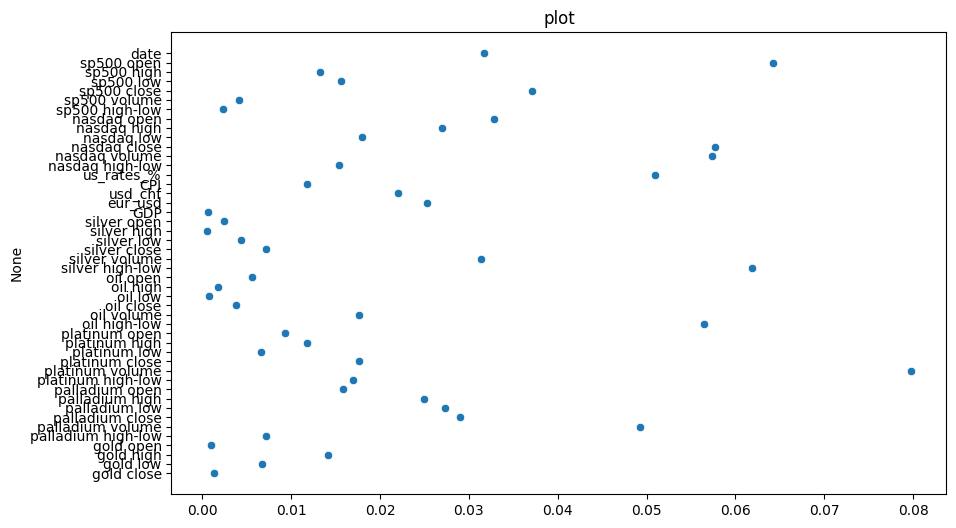

In [14]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=model.feature_importances_,y=x.columns)
plt.title("plot")
plt.show()

In [15]:
df.columns

Index(['date', 'sp500 open', 'sp500 high', 'sp500 low', 'sp500 close',
       'sp500 volume', 'sp500 high-low', 'nasdaq open', 'nasdaq high',
       'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low',
       'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver open',
       'silver high', 'silver low', 'silver close', 'silver volume',
       'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close',
       'oil volume', 'oil high-low', 'platinum open', 'platinum high',
       'platinum low', 'platinum close', 'platinum volume',
       'platinum high-low', 'palladium open', 'palladium high',
       'palladium low', 'palladium close', 'palladium volume',
       'palladium high-low', 'gold open', 'gold high', 'gold low',
       'gold close', 'gold volume'],
      dtype='object')